In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# P = transition probability matrix

P = np.array([
    [0,   0.5, 0.5, 0,   0,   0],
    [0.2, 0,   0.8, 0,   0,   0],
    [0,   0,   0,   0.5, 0.5, 0],
    [0,   0,   0,   0,   0.4, 0.6],
    [0,   0,   0,   0.5, 0,   0.5],
    [0,   0,   0,   0.3, 0.7, 0]
])

n_states = P.shape[0]
rng = np.random.default_rng(seed=42)


In [3]:
# Simulate one trajectory

def simulate_trajectory(start_state,trajectory_length):
  path = [start_state]
  state = start_state
  for _ in range(trajectory_length):
    state = rng.choice(n_states,p=P[state])
    path.append(state)

  return path



In [4]:
# Part 1 : Communicating classes

def empirical_reachability(N=500,T=10):
  R = np.zeros((n_states,n_states),dtype=int)

  for i in range(n_states):
    for _ in range(N):
      path = simulate_trajectory(i,T)
      for j in set(path):
        R[i,j] = 1

  return R


def find_communicating_classes(R):
  visited = set()
  classes = []

  for i in range(n_states):
    if i in visited:
      continue
    cls = {j for j in range(n_states) if R[i,j] == 1 and R[j,i] == 1}
    visited |= cls
    classes.append(cls)


  return classes

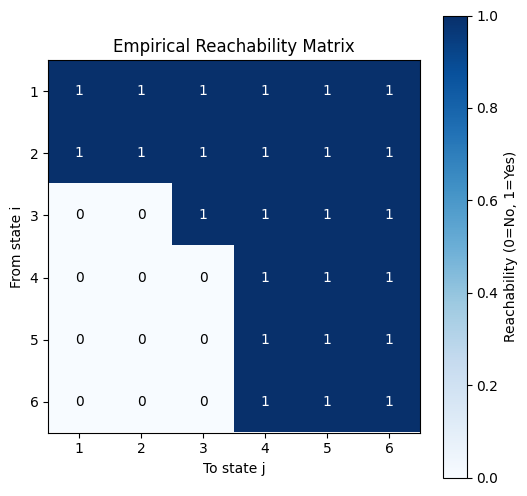

In [5]:
R = empirical_reachability()
plt.figure(figsize=(6,6))
plt.imshow(R , cmap='Blues' , interpolation='nearest')

for i in range(R.shape[0]):
  for j in range(R.shape[1]):
    plt.text(j,i,R[i,j],ha='center',va='center',color='white' if R[i,j] else 'black')

plt.title("Empirical Reachability Matrix")
plt.xlabel("To state j")
plt.ylabel("From state i")
plt.xticks(range(n_states), [f"{j+1}" for j in range(n_states)])
plt.yticks(range(n_states), [f"{i+1}" for i in range(n_states)])
plt.colorbar(label="Reachability (0=No, 1=Yes)")
plt.show()

In [6]:
classes = find_communicating_classes(R)
print("\nCommunicating Classes (0-based states):")
for idx, cls in enumerate(classes, 1):
  print(f"Class {idx}: {sorted(list(cls))}")


Communicating Classes (0-based states):
Class 1: [0, 1]
Class 2: [2]
Class 3: [3, 4, 5]


In [7]:
# Part 2 : Empirical verification of transience or recurrence

def classify_states(N=500,T=100):
  classification = {}

  for i in range(n_states):
    returns = 0
    for _ in range(N):
      path = simulate_trajectory(i,T)
      if i in path[1:]:
        returns += 1
    f_i = returns/N
    classification[i] = "recurrent" if np.isclose(f_i,1.0) else "transient"

  return classification



In [8]:
classification = classify_states()
print("\nEmpirical Classification of States:")
for s , c in classification.items():
  print(f"State {s+1}: {c}")


Empirical Classification of States:
State 1: transient
State 2: transient
State 3: transient
State 4: recurrent
State 5: recurrent
State 6: recurrent


In [9]:
# Part 3 : Verification of Class properties

def verify_class_properties(classes,classification):
  results = {}
  for idx , cls in enumerate(classes,1):
    labels = {classification[s] for s in cls}
    results[f"Class {idx}"] = labels

  return results



In [10]:
results = verify_class_properties(classes, classification)
print("\nClass Properties Verification:")
for cls, labels in results.items():
  print(f"{cls}: {labels}")


Class Properties Verification:
Class 1: {'transient'}
Class 2: {'transient'}
Class 3: {'recurrent'}
